In [1]:
import sys
sys.path.append('../')
import numpy as np
import os
import matplotlib.pyplot as plt
from src.sample_tiles import *
%load_ext autoreload
%autoreload 2
%matplotlib inline

## Step 1. Sample triplets

In [2]:
tiles_size = 50

img_dir = '../data/sar/RS2-Flevoland/rgb-gray/' # directory where images are saved
img_triplets = get_triplet_imgs(img_dir, img_ext='.npy', n_triplets=100000)
print(img_triplets[:1,:])

tile_dir = '../data/sar/RS2-Flevoland/rgb-gray/triplets_' + str(tiles_size) 
tiles = get_triplet_tiles(tile_dir,
                          img_dir, 
                          img_triplets, 
                          tiles_size,
                          val_type='uint8',
                          bands_only=True,
                          save=True,
                          verbose=False)

[['flevoland_BGRM.npy' 'flevoland_BGRM.npy']
 ['flevoland_BGRM.npy' 'flevoland_BGRM.npy']
 ['flevoland_BGRM.npy' 'flevoland_BGRM.npy']
 ['flevoland_BGRM.npy' 'flevoland_BGRM.npy']
 ['flevoland_BGRM.npy' 'flevoland_BGRM.npy']]


## Step 2. Sample tiles

In [ ]:
img_dir = '../data/sar/RS2-Flevoland/rgb-gray/' # directory where images are saved
img_triplets = get_triplet_imgs(img_dir, img_ext='.npy', n_triplets=10000)
print(img_triplets[:1,:])

tile_dir = '../data/sar/RS2-Flevoland/rgb-gray/tiles_' + str(tiles_size) 
# tiles 是tile的中心坐标，对应原始图像中的坐标
tiles = get_tiles(tile_dir,
                          img_dir, 
                          img_triplets, 
                          tile_size=50,
                          val_type='uint8',
                          bands_only=True,
                          save=True,
                          verbose=False)

## Visualize some tiles!

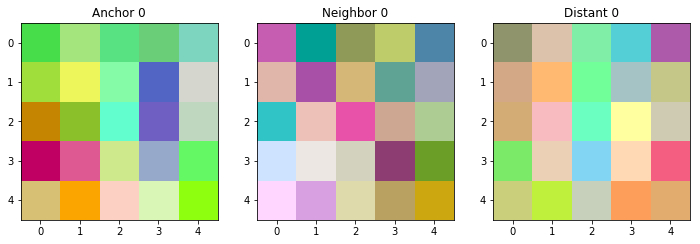

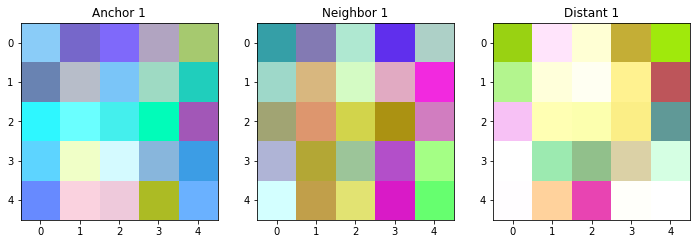

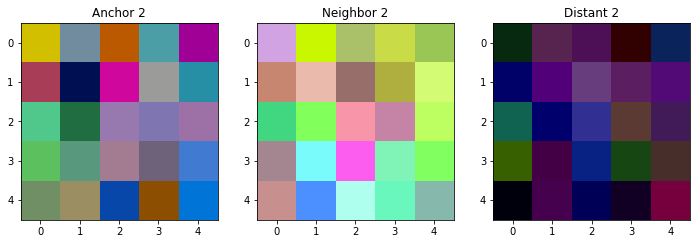

In [8]:
n_triplets = 1
plt.rcParams['figure.figsize'] = (12,4)
for i in range(n_triplets):
    tile = np.load(os.path.join(tile_dir, str(i)+'anchor.npy'))
    neighbor = np.load(os.path.join(tile_dir, str(i)+'neighbor.npy'))
    distant = np.load(os.path.join(tile_dir, str(i)+'distant.npy'))
    
    vmin = np.array([tile, neighbor, distant]).min()
    vmax = np.array([tile, neighbor, distant]).max()
    
    plt.figure()
    plt.subplot(1,3,1)
    plt.imshow(tile[:,:,[0,1,2]])
    plt.title('Anchor '+str(i))
    plt.subplot(1,3,2)
    plt.imshow(neighbor[:,:,[0,1,2]])
    plt.title('Neighbor '+str(i))
    plt.subplot(1,3,3)
    plt.imshow(distant[:,:,[0,1,2]])
    plt.title('Distant '+str(i))